Day 16

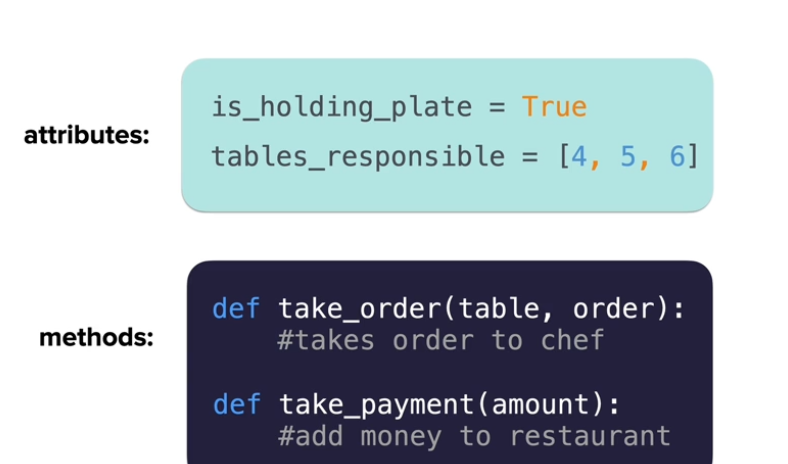

In [ ]:
#Basically remember the class and attributes structure

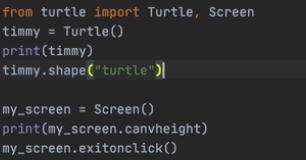

In [ ]:
#use Pypi to download new packages

In [1]:
class CoffeeMaker:
    """Models the machine that makes the coffee"""
    def __init__(self):
        self.resources = {
            "water": 300,
            "milk": 200,
            "coffee": 100,
        }

    def report(self):
        """Prints a report of all resources."""
        print(f"Water: {self.resources['water']}ml")
        print(f"Milk: {self.resources['milk']}ml")
        print(f"Coffee: {self.resources['coffee']}g")

    def is_resource_sufficient(self, drink):
        """Returns True when order can be made, False if ingredients are insufficient."""
        can_make = True
        for item in drink.ingredients:
            if drink.ingredients[item] > self.resources[item]:
                print(f"Sorry there is not enough {item}.")
                can_make = False
        return can_make

    def make_coffee(self, order):
        """Deducts the required ingredients from the resources."""
        for item in order.ingredients:
            self.resources[item] -= order.ingredients[item]
        print(f"Here is your {order.name} ☕️. Enjoy!")


In [2]:
class MoneyMachine:

    CURRENCY = "$"

    COIN_VALUES = {
        "quarters": 0.25,
        "dimes": 0.10,
        "nickles": 0.05,
        "pennies": 0.01
    }

    def __init__(self):
        self.profit = 0
        self.money_received = 0

    def report(self):
        """Prints the current profit"""
        print(f"Money: {self.CURRENCY}{self.profit}")

    def process_coins(self):
        """Returns the total calculated from coins inserted."""
        print("Please insert coins.")
        for coin in self.COIN_VALUES:
            self.money_received += int(input(f"How many {coin}?: ")) * self.COIN_VALUES[coin]
        return self.money_received

    def make_payment(self, cost):
        """Returns True when payment is accepted, or False if insufficient."""
        self.process_coins()
        if self.money_received >= cost:
            change = round(self.money_received - cost, 2)
            print(f"Here is {self.CURRENCY}{change} in change.")
            self.profit += cost
            self.money_received = 0
            return True
        else:
            print("Sorry that's not enough money. Money refunded.")
            self.money_received = 0
            return False
        


In [3]:
class MenuItem:
    """Models each Menu Item."""
    def __init__(self, name, water, milk, coffee, cost):
        self.name = name
        self.cost = cost
        self.ingredients = {
            "water": water,
            "milk": milk,
            "coffee": coffee
        }


class Menu:
    """Models the Menu with drinks."""
    def __init__(self):
        self.menu = [
            MenuItem(name="latte", water=200, milk=150, coffee=24, cost=2.5),
            MenuItem(name="espresso", water=50, milk=0, coffee=18, cost=1.5),
            MenuItem(name="cappuccino", water=250, milk=50, coffee=24, cost=3),
        ]

    def get_items(self):
        """Returns all the names of the available menu items"""
        options = ""
        for item in self.menu:
            options += f"{item.name}/"
        return options

    def find_drink(self, order_name):
        """Searches the menu for a particular drink by name. Returns that item if it exists, otherwise returns None"""
        for item in self.menu:
            if item.name == order_name:
                return item
        print("Sorry that item is not available.")


In [ ]:
money_machine = MoneyMachine()
coffee_maker = CoffeeMaker()
menu = Menu()

is_on = True

while is_on:
    options = menu.get_items()
    choice = input(f"What would you like? ({options}): ")
    if choice == "off":
        is_on = False
    elif choice == "report":
        coffee_maker.report()
        money_machine.report()
    else:
        drink = menu.find_drink(choice)
        
        if coffee_maker.is_resource_sufficient(drink) and money_machine.make_payment(drink.cost):
          coffee_maker.make_coffee(drink)
